In [1]:
# 数値計算に使うライブラリ
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

# グラフを描画するライブラリ
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 統計モデルを推定するライブラリ(ワーニングが出ることもあります)
import statsmodels.formula.api as smf
import statsmodels.api as sm

# 表示桁数の指定
%precision 3
# グラフをjupyter Notebook内に表示させるための指定
%matplotlib inline

/Users/takeisatoshisui/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [1]:
sales  = pd.read_csv('5-3-1-lm-model.csv')
print(sales.head(3))

NameError: name 'pd' is not defined

In [2]:
sns.pairplot(data = sales, hue = 'weather',
            palette = 'gray')

NameError: name 'sns' is not defined

In [4]:
#天気別の平均値
print(sales.groupby('weather').mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


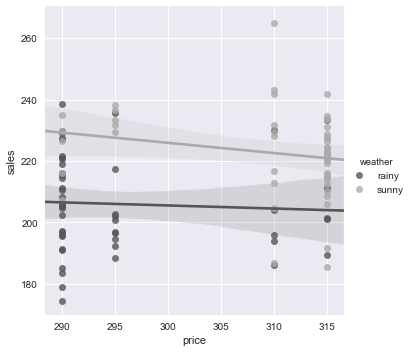

In [5]:
sns.lmplot(x= 'price' , y = 'sales' , data = sales,
          hue = 'weather' , palette = 'gray')

In [7]:
#3-5多重回帰分析
##複数の説明変数を持つモデルを推定する
lm_sales = smf.ols(
'sales ~ weather + humidity + temperature + price',
data = sales).fit()
#推定された結果
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [8]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [12]:
#3-9モデル選択
 ##Nullモデルの残差平方和
mod_null = smf.ols('sales~1',sales).fit()
resid_sq_null = sp.sum(mod_null.resid**2)
resid_sq_null

28968.525899999993

In [16]:
##天気モデルの残差平方和
mod_1  = smf.ols('sales~weather' , sales).fit()
resid_sq_1 = sp.sum(mod_1.resid**2)
resid_sq_1

21917.564999999995

In [17]:
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


/Users/takeisatoshisui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/takeisatoshisui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/takeisatoshisui/anaconda3/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [20]:
##全ての変数を含んだ残差平方和
mod_full  = smf.ols(
'sales ~ weather + humidity + temperature + price',
sales).fit()
resid_sq_full = sp.sum(mod_full.resid**2)
resid_sq_full

17242.71694236648

In [21]:
#AICによる変数選択
print('全変数入りモデル:',mod_full.aic.round(3))
print('天気のみモデル:',mod_1.aic.round(3))

全変数入りモデル: 808.785
天気のみモデル: 826.775
